### Problem Statement:

A banking institution requires actionable insights from the perspective of Mortgage-Backed Securities, Geographic Business Investment and Real Estate Analysis. 

The objective is to identify white spaces/potential business in the mortgage loan. The mortgage bank would like to identify potential monthly mortgage expenses for each of region based on factors which are primarily monthly family income in a region and rented value of the real estate. Some of the regions are growing rapidly and Competitor banks are selling mortgage loans to subprime customers at a lower interest rate. The bank is strategizing for better market penetration and targeting new customers. A statistical model needs to be created to predict the potential demand in dollars amount of loan for each of the region in the USA. Also, there is a need to create a dashboard which would refresh periodically post data retrieval from the agencies. This would help to monitor the key metrics and trends.

The dashboard must demonstrate relationships and trends for the key metrics as follows:  number of loans, average rental income, monthly mortgage and owner’s cost, family income vs mortgage cost comparison across different regions. The metrics are described not to limit the dashboard to these few only. 

### Dataset Description

Following are the themes the fields fall under Home Owner Costs: Sum of utilities, property taxes.

	Second Mortgage: Households with a second mortgage statistics.

	Home Equity Loan: Households with a Home equity Loan statistics.

	Debt: Households with any type of debt statistics.

	Mortgage Costs: Statistics regarding mortgage payments, home equity loans, utilities and property taxes

	Home Owner Costs: Sum of utilities, property taxes statistics

	Gross Rent: Contract rent plus the estimated average monthly cost of utility features

	Gross Rent as Percent of Income Gross rent as the percent of income very interesting

	High school Graduation: High school graduation statistics.

	Population Demographics: Population demographic statistics.

	Age Demographics: Age demographic statistics.

	Household Income: Total income of people residing in the household.

	Family Income: Total income of people related to the householder


### Project Task: Week 1

### Import Required Libraries 

In [1]:
import time
import random
from math import *
import operator
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline
from pandas.plotting import scatter_matrix
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Data Import and Preparation:

#### Import data.

In [2]:
df_train = pd.read_csv("train.csv")

In [3]:
df_test = pd.read_csv("test.csv")

In [4]:
df_train.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [5]:
df_train.shape

(27321, 80)

In [6]:
df_test.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
1,252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
2,276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
3,248614,NaN,140,231,21,Kentucky,KY,Monticello,Monticello City,City,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
4,286865,NaN,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379


In [7]:
df_test.shape

(11709, 80)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709 entries, 0 to 11708
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          11709 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     11709 non-null  int64  
 3   COUNTYID                     11709 non-null  int64  
 4   STATEID                      11709 non-null  int64  
 5   state                        11709 non-null  object 
 6   state_ab                     11709 non-null  object 
 7   city                         11709 non-null  object 
 8   place                        11709 non-null  object 
 9   type                         11709 non-null  object 
 10  primary                      11709 non-null  object 
 11  zip_code                     11709 non-null  int64  
 12  area_code                    11709 non-null  int64  
 13  lat             

### Figure out the primary key and look for the requirement of indexing.

In [10]:
#UID is the primary key

df_train.set_index(keys=['UID'], inplace=True)

df_test.set_index(keys=['UID'], inplace=True)

In [11]:
df_train.head(2)

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.0877
246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.0903


In [12]:
df_test.head(2)

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,tract,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,tract,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377


### Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable.

In [13]:
# percentage of missing values in train set
missing_list_train = df_train.isnull().sum()*100/len(df_train)

missing_values_df_train = pd.DataFrame(missing_list_train, columns=['Percentage_of_missing_values'])

missing_values_df_train.sort_values(by = ['Percentage_of_missing_values'], inplace=True, ascending=False)

missing_values_df_train[missing_values_df_train['Percentage_of_missing_values']>0][:80]

,Percentage_of_missing_values
BLOCKID,100.000000
hc_samples,2.196113
hc_mean,2.196113
hc_median,2.196113
hc_stdev,2.196113
hc_sample_weight,2.196113
hc_mortgage_mean,2.097288
hc_mortgage_stdev,2.097288
hc_mortgage_sample_weight,2.097288
hc_mortgage_samples,2.097288


In [14]:
# percentage of missing values in test set
missing_list_test = df_test.isnull().sum()*100/len(df_train)

missing_values_df_test = pd.DataFrame(missing_list_test, columns=['Percentage_of_missing_values'])

missing_values_df_test.sort_values(by = ['Percentage_of_missing_values'], inplace=True, ascending=False)

missing_values_df_test[missing_values_df_test['Percentage_of_missing_values']>0][:80]

,Percentage_of_missing_values
BLOCKID,42.857143
hc_samples,1.061455
hc_mean,1.061455
hc_median,1.061455
hc_stdev,1.061455
hc_sample_weight,1.061455
hc_mortgage_mean,0.980930
hc_mortgage_stdev,0.980930
hc_mortgage_sample_weight,0.980930
hc_mortgage_samples,0.980930


BLOCKID has 100% missing values in train set, and 42% in test set we can drop it,dropping SUMLEVEL & primary too, as they are of no use for further exploration.

In [15]:
df_train.drop(columns=['BLOCKID','SUMLEVEL','primary'], inplace=True)

In [16]:
df_test.drop(columns=['BLOCKID','SUMLEVEL','primary'], inplace=True)

In [17]:
df_train.head(1)

,COUNTYID,STATEID,state,state_ab,city,place,type,zip_code,area_code,lat,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
267822,53,36,New York,NY,Hamilton,Hamilton,City,13346,315,42.840812,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.0124,0.0877


In [18]:
df_test.head(1)

,COUNTYID,STATEID,state,state_ab,city,place,type,zip_code,area_code,lat,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
255504,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,48239,313,42.346422,...,34.78682,33.75,21.58531,416.48097,1938.0,0.70252,0.28217,0.0591,0.03813,0.14299


In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27321 entries, 267822 to 265371
Data columns (total 76 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   COUNTYID                     27321 non-null  int64  
 1   STATEID                      27321 non-null  int64  
 2   state                        27321 non-null  object 
 3   state_ab                     27321 non-null  object 
 4   city                         27321 non-null  object 
 5   place                        27321 non-null  object 
 6   type                         27321 non-null  object 
 7   zip_code                     27321 non-null  int64  
 8   area_code                    27321 non-null  int64  
 9   lat                          27321 non-null  float64
 10  lng                          27321 non-null  float64
 11  ALand                        27321 non-null  float64
 12  AWater                       27321 non-null  int64  
 13  pop       

In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11709 entries, 255504 to 287763
Data columns (total 76 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   COUNTYID                     11709 non-null  int64  
 1   STATEID                      11709 non-null  int64  
 2   state                        11709 non-null  object 
 3   state_ab                     11709 non-null  object 
 4   city                         11709 non-null  object 
 5   place                        11709 non-null  object 
 6   type                         11709 non-null  object 
 7   zip_code                     11709 non-null  int64  
 8   area_code                    11709 non-null  int64  
 9   lat                          11709 non-null  float64
 10  lng                          11709 non-null  float64
 11  ALand                        11709 non-null  int64  
 12  AWater                       11709 non-null  int64  
 13  pop       

In [21]:
missing_train_cols = []

for col in df_train.columns:
    if df_train[col].isnull().sum() != 0:
        missing_train_cols.append(col)

print(missing_train_cols)

['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'male_age_median', 'male_age_stdev', 'male_age_sample_weight', 'male_age_samples', 'female_age_mean', 'female_age_median', 'female_age_stdev', 'female_age_sample_weight', 'female_age_samples', 'pct_own', 'married', 'married_snp', 'separated', 'divorced']


In [22]:
missing_test_cols = []

for col in df_test.columns:
    if df_test[col].isnull().sum() != 0:
        missing_test_cols.append(col)
        
print(missing_test_cols)

['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'male_age_median', 'male_age_stdev', 'male_age_sample_weight', 'male_age_samples', 'female_age_mean', 'female_age_median', 'female_age_stdev', 'female_age_sample_weight', 'female_age_samples', 'pct_own', 'married', 'married_snp', 'separated', 'divorced']


Treating missing values by replacing it by mean as all the missing value col variables are numerical

In [23]:
for col in df_train.columns:
    if col in (missing_train_cols):
        df_train[col].replace(np.nan, df_train[col].mean(), inplace=True)

In [24]:
for col in df_test.columns:
    if col in (missing_test_cols):
        df_test[col].replace(np.nan, df_test[col].mean(), inplace=True)

In [25]:
df_train.isnull().sum().any()

False

In [26]:
df_test.isnull().sum().any()

False

#### Exploratory Data Analysis (EDA):

#### Perform debt analysis. You may take the following steps:

- Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. 

- Visualize using geo-map. 

- You may keep the upper limit for the percent of households with a second mortgage to 50 percent

In [27]:
from pandasql import sqldf
q1 = "select place,pct_own,second_mortgage,lat,lng from df_train where pct_own >0.10 and second_mortgage <0.5 order by second_mortgage DESC LIMIT 2500;"
pysqldf = lambda q: sqldf(q, globals())
df_train_location_mort_pct=pysqldf(q1)

In [28]:
df_train_location_mort_pct.head()

,place,pct_own,second_mortgage,lat,lng
0,Worcester City,0.20247,0.43363,42.254262,-71.800347
1,Harbor Hills,0.15618,0.31818,40.751809,-73.853582
2,Glen Burnie,0.22380,0.30212,39.127273,-76.635265
3,Egypt Lake-leto,0.11618,0.28972,28.029063,-82.495395
4,Lincolnwood,0.14228,0.28899,41.967289,-87.652434


In [29]:
import plotly.express as px
import plotly.graph_objects as go

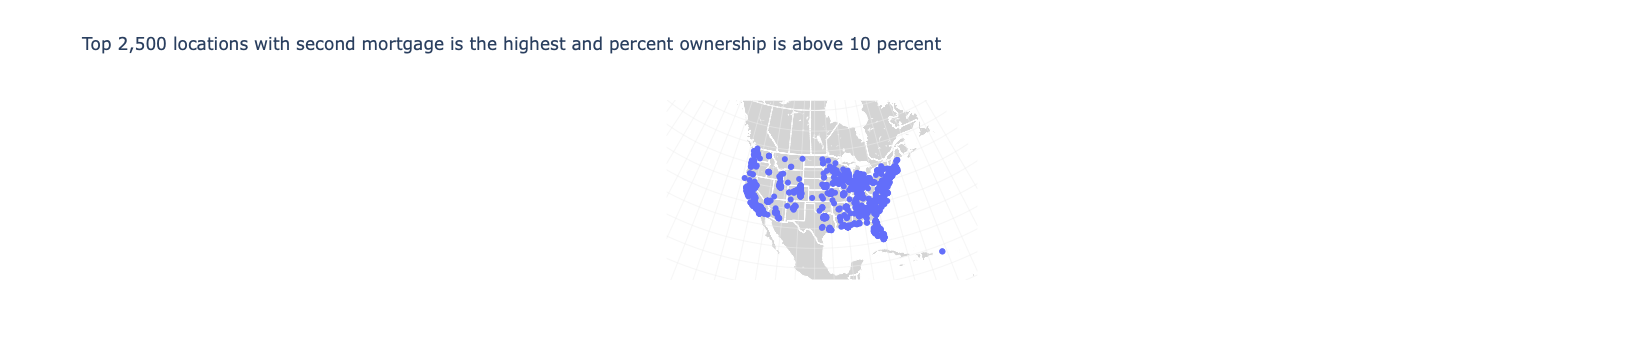

<Figure size 1080x2160 with 0 Axes>

In [106]:
plt.figure(figsize=(15,30))
fig = go.Figure(data=go.Scattergeo(
    lat = df_train_location_mort_pct['lat'],
    lon = df_train_location_mort_pct['lng']),
    )
fig.update_layout(
    geo=dict(
        scope = 'north america',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'conic conformal',
            rotation_lon = -100
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 20.0, 60.0 ],
            dtick = 5
        )
    ),
    title='Top 2,500 locations with second mortgage is the highest and percent ownership is above 10 percent')
fig.show()

- Use the following bad debt equation:
    - Bad Debt = P (Second Mortgage ∩ Home Equity Loan)
    - Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage

In [31]:
df_train["bad_debt"] = df_train['second_mortgage'] + df_train['home_equity'] - df_train['home_equity_second_mortgage']

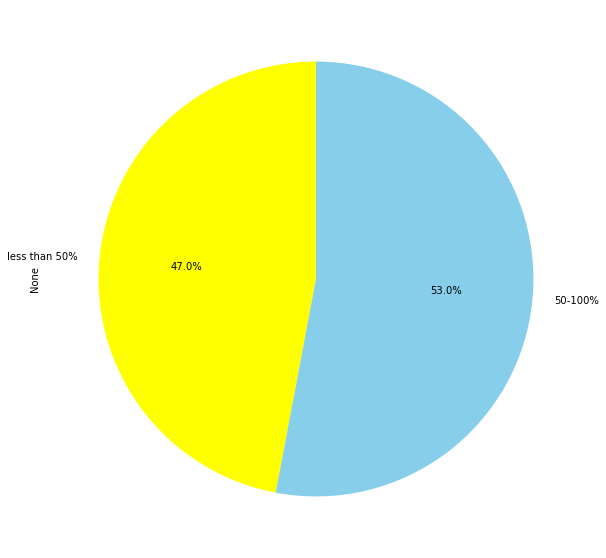

In [32]:
plt.figure(figsize=(15,10))
df_train['bins'] = pd.cut(df_train['bad_debt'],bins=[0,0.10,1], labels=["less than 50%", "50-100%"])
df_train.groupby(['bins']).size().plot(kind='pie', subplots=True,startangle=90, autopct='%1.1f%%',colors=["yellow","skyblue"]);

- Create pie charts  to show overall debt and bad debt

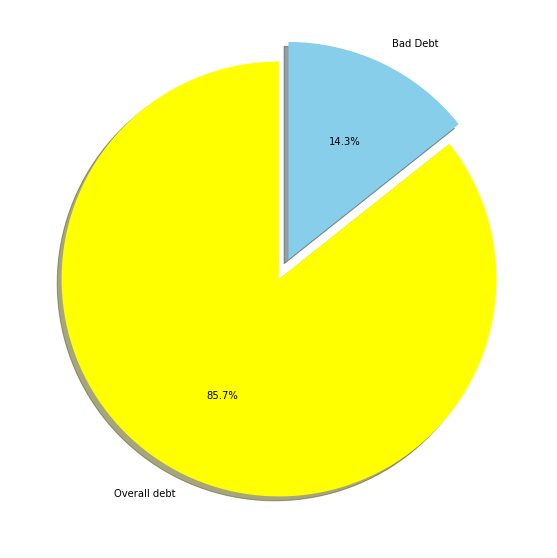

In [33]:
plt.figure(figsize=(15,10))
label=["Overall debt","Bad Debt"]
values=[df_train["debt"].values.sum(),df_train["bad_debt"].values.sum()]
plt.pie(values,labels=label,autopct='%1.1f%%',explode=(0,.1),startangle=90,shadow=True,colors=["yellow","skyblue"])
plt.show()

- Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities

In [34]:
df_train['good_debt']=df_train['debt']-df_train['bad_debt']

In [35]:
df_train["city"].value_counts().sort_values(ascending=False)[:100]

Chicago          294
Brooklyn         282
Los Angeles      243
Houston          222
Philadelphia     165
                ... 
Norfolk           32
Dayton            31
Staten Island     31
Manchester        31
Franklin          31
Name: city, Length: 100, dtype: int64

<Figure size 1080x720 with 0 Axes>

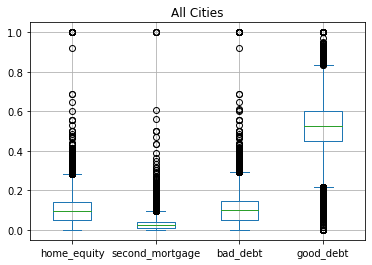

In [36]:
plt.figure(figsize=(15,10))
import matplotlib.pyplot as plt
all_cities=df_train[['home_equity','second_mortgage','bad_debt', 'good_debt']]
all_cities.plot.box(grid=True)
plt.title('All Cities')
plt.show()

<Figure size 1080x720 with 0 Axes>

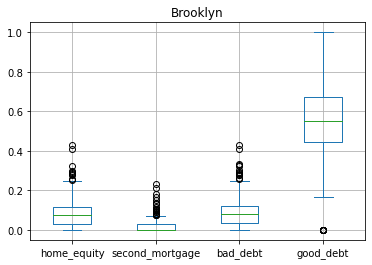

In [37]:
plt.figure(figsize=(15,10))
Brooklyn=df_train[df_train['city']=='Brooklyn']
Brooklyn=Brooklyn[['home_equity','second_mortgage','bad_debt', 'good_debt']]
Brooklyn.plot.box(grid=True)
plt.title('Brooklyn')
plt.show()

<Figure size 1080x720 with 0 Axes>

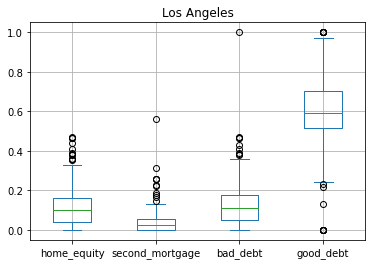

In [38]:
plt.figure(figsize=(15,10))
Los_Angeles  =df_train[df_train['city']=='Los Angeles']
Los_Angeles=Los_Angeles[['home_equity','second_mortgage','bad_debt', 'good_debt']]
Los_Angeles.plot.box(grid=True)
plt.title('Los Angeles')
plt.show()

<Figure size 1080x720 with 0 Axes>

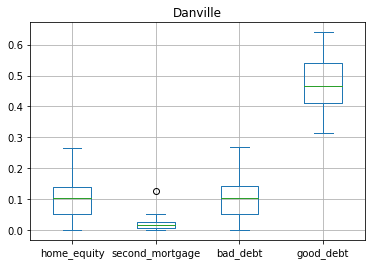

In [39]:
plt.figure(figsize=(15,10))
Danville=df_train[df_train['city']=='Danville']
Danville=Danville[['home_equity','second_mortgage','bad_debt', 'good_debt']]
Danville.plot.box(grid=True)
plt.title('Danville')
plt.show()

<Figure size 1080x720 with 0 Axes>

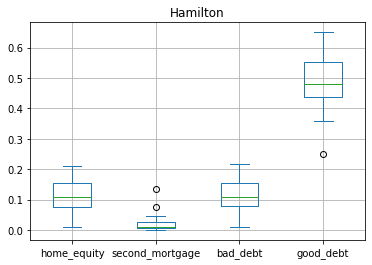

In [40]:
plt.figure(figsize=(15,10))
Hamilton=df_train[df_train['city']=='Hamilton']
Hamilton=Hamilton[['home_equity','second_mortgage','bad_debt', 'good_debt']]
Hamilton.plot.box(grid=True)
plt.title('Hamilton')
plt.show()

<Figure size 1080x720 with 0 Axes>

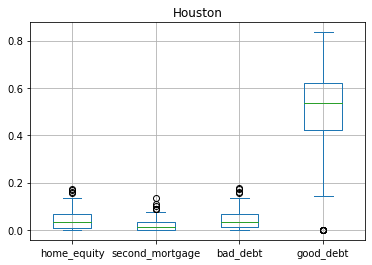

In [41]:
plt.figure(figsize=(15,10))
Houston  =df_train[df_train['city']=='Houston']
Houston=Houston[['home_equity','second_mortgage','bad_debt', 'good_debt']]
Houston.plot.box(grid=True)
plt.title('Houston')
plt.show()

<Figure size 1080x720 with 0 Axes>

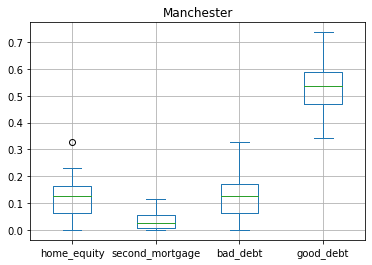

In [42]:
plt.figure(figsize=(15,10))
Manchester  =df_train[df_train['city']=='Manchester']
Manchester=Manchester[['home_equity','second_mortgage','bad_debt', 'good_debt']]
Manchester.plot.box(grid=True)
plt.title('Manchester')
plt.show()

- Create a collated income distribution chart for family income, house hold income, and remaining income

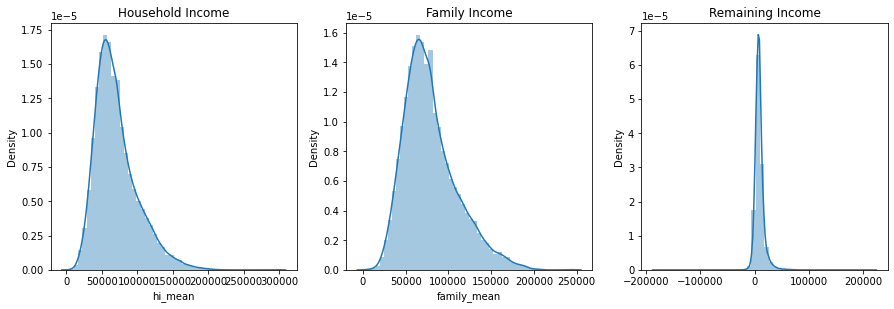

In [43]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.distplot(df_train['hi_mean'])
plt.title('Household Income')

plt.subplot(2,3,2)
sns.distplot(df_train['family_mean'])
plt.title('Family Income')

plt.subplot(2,3,3)
sns.distplot(df_train['family_mean']-df_train['hi_mean'])
plt.title('Remaining Income')
plt.show()

#### Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements): 

- Use pop and ALand variables to create a new field called population density

In [44]:
df_train['pop_density']=df_train['pop']/df_train['ALand']

In [45]:
df_test['pop_density']=df_test['pop']/df_test['ALand']

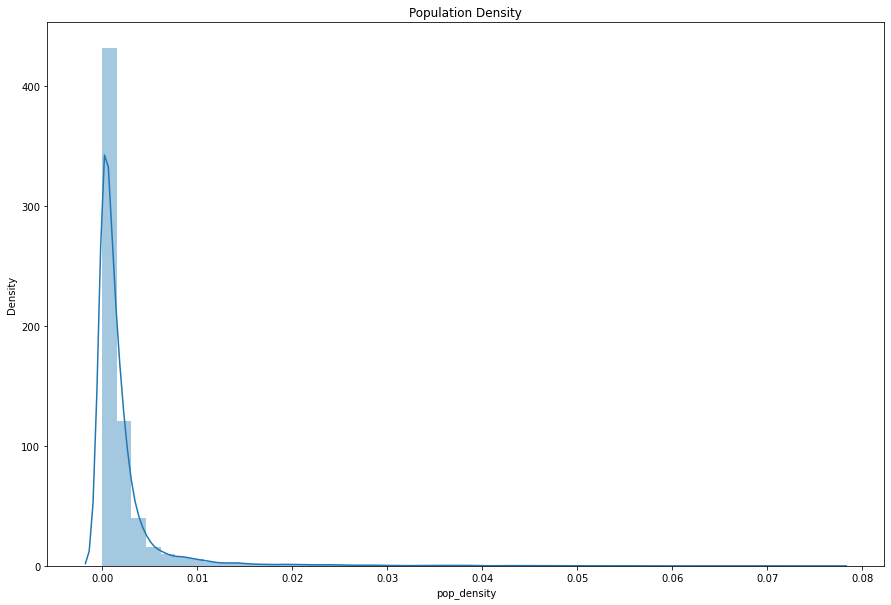

In [46]:
plt.figure(figsize=(15,10))
sns.distplot(df_train['pop_density'])
plt.title('Population Density')
plt.show() # Very less density is noticed

- Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age


In [47]:
df_train['age_median']=(df_train['male_age_median']+df_train['female_age_median'])/2
df_test['age_median']=(df_test['male_age_median']+df_test['female_age_median'])/2

 - Visualize the findings using appropriate chart type

In [48]:
df_train[['male_age_median','female_age_median','male_pop','female_pop','age_median']].head()

,male_age_median,female_age_median,male_pop,female_pop,age_median
UID,,,,,
267822,44.00000,45.33333,2612,2618,44.666665
246444,32.00000,37.58333,1349,1284,34.791665
245683,40.83333,42.83333,3643,3238,41.833330
279653,48.91667,50.58333,1141,1559,49.750000
247218,22.41667,21.58333,2586,3051,22.000000


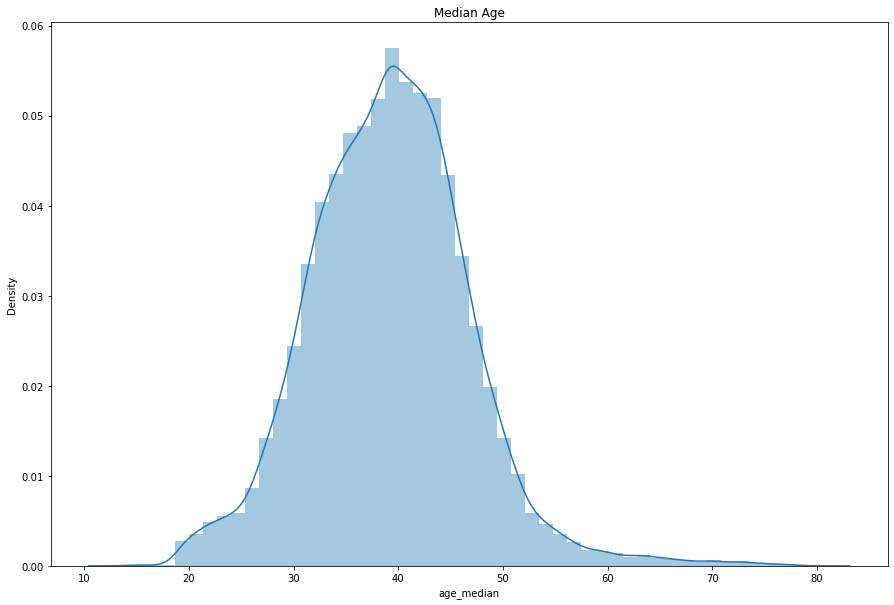

In [49]:
plt.figure(figsize=(15,10))
sns.distplot(df_train['age_median']);
plt.title("Median Age")
plt.show()

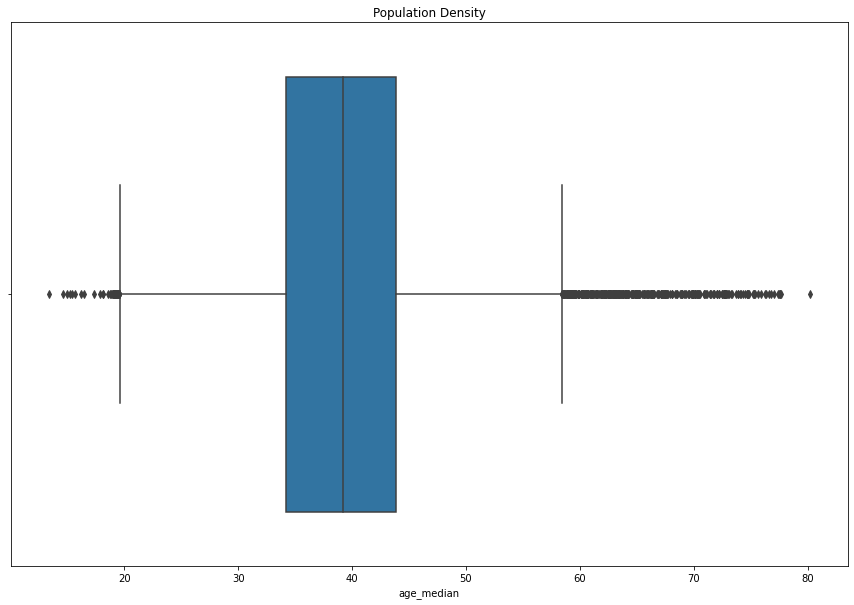

In [50]:
plt.figure(figsize=(15,10))
sns.boxplot(df_train['age_median']);
plt.title('Population Density')
plt.show()

#### Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.


In [51]:
df_train['pop_bins'] = pd.cut(df_train['pop'],bins=5,labels=['very_low', 'low','medium','high','very_high'])

In [52]:
df_train['pop_bins'].value_counts()

very_low     27058
low            246
medium           9
high             7
very_high        1
Name: pop_bins, dtype: int64

- Analyze the married, separated, and divorced population for these population brackets

In [53]:
df_train.groupby(by='pop_bins')[['married', 'separated', 'divorced']].count()

,married,separated,divorced
pop_bins,,,
very_low,27058,27058,27058
low,246,246,246
medium,9,9,9
high,7,7,7
very_high,1,1,1


<Figure size 1080x720 with 0 Axes>

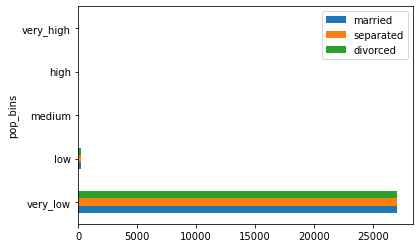

In [54]:
plt.figure(figsize=(15,10))
df_train.groupby(by='pop_bins')[['married', 'separated', 'divorced']].count().plot(kind='barh');

 - Visualize using appropriate chart type

In [55]:
df_train.groupby(by='pop_bins')[['married', 'separated', 'divorced']].agg(['mean','median'])

married           separated            divorced          
               mean    median      mean    median      mean    median
pop_bins                                                             
very_low   0.507548  0.524680  0.019126  0.013650  0.100504  0.096020
low        0.584894  0.593135  0.015833  0.011195  0.075348  0.070045
medium     0.655737  0.618710  0.005003  0.004120  0.065927  0.064890
high       0.503359  0.335660  0.008141  0.002500  0.039030  0.010320
very_high  0.734740  0.734740  0.004050  0.004050  0.030360  0.030360

<Figure size 1080x720 with 0 Axes>

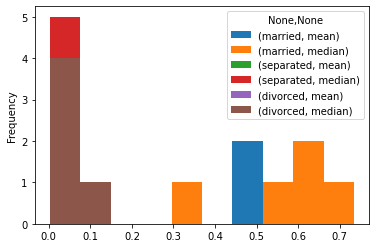

In [56]:
plt.figure(figsize=(15,10))
df_train.groupby(by='pop_bins')[['married', 'separated', 'divorced']].agg(['mean','median']).plot(kind='hist');

<Figure size 1080x720 with 0 Axes>

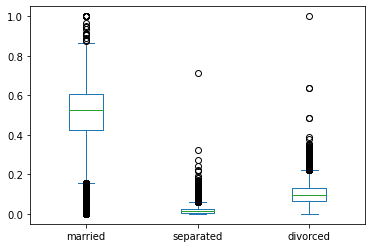

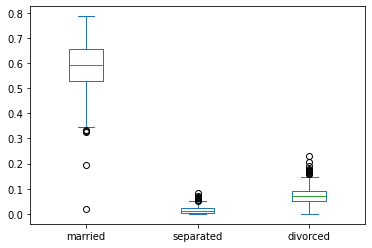

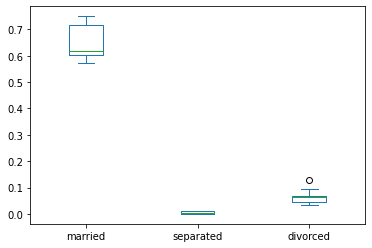

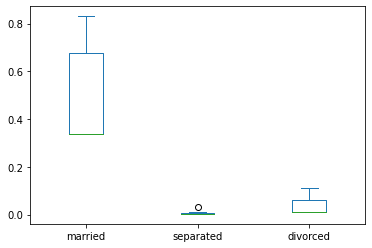

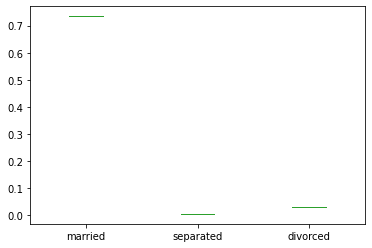

In [57]:
plt.figure(figsize=(15,10))
df_train.groupby(by='pop_bins')[['married', 'separated', 'divorced']].plot(kind='box');

<Figure size 720x360 with 0 Axes>

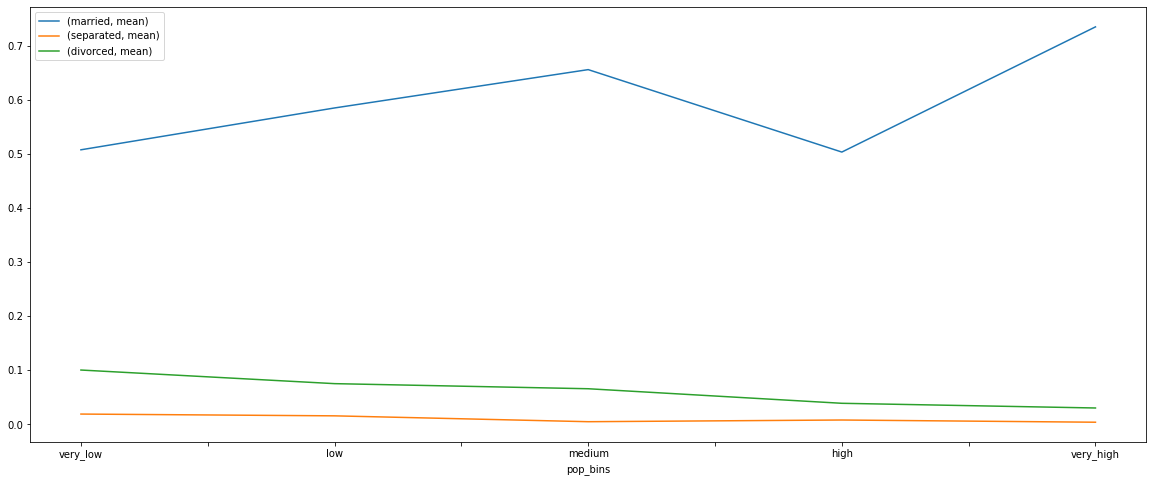

In [58]:
plt.figure(figsize=(10,5));
pop_bin_married = df_train.groupby(by='pop_bins')[['married', 'separated', 'divorced']].agg(['mean']);

pop_bin_married.plot(figsize = (20,8));
plt.legend(loc='best');
plt.show();

#### Please detail your observations for rent as a percentage of income at an overall level, and for different states.

In [59]:
rent_state_mean = df_train.groupby(by='state')['rent_mean'].agg(["mean"])
rent_state_mean.head()

,mean
state,
Alabama,774.004927
Alaska,1185.763570
Arizona,1097.753511
Arkansas,720.918575
California,1471.133857


In [60]:
income_state_mean = df_train.groupby(by='state')['family_mean'].agg(["mean"])

income_state_mean.head()

,mean
state,
Alabama,67030.064213
Alaska,92136.545109
Arizona,73328.238798
Arkansas,64765.377850
California,87655.470820


In [61]:
rent_per_of_income = rent_state_mean['mean']/income_state_mean['mean']

In [62]:
rent_per_of_income

state
Alabama                 0.011547
Alaska                  0.012870
Arizona                 0.014970
Arkansas                0.011131
California              0.016783
Colorado                0.013529
Connecticut             0.012637
Delaware                0.012929
District of Columbia    0.013198
Florida                 0.015772
Georgia                 0.013161
Hawaii                  0.018224
Idaho                   0.011957
Illinois                0.012620
Indiana                 0.012022
Iowa                    0.009940
Kansas                  0.011066
Kentucky                0.011068
Louisiana               0.012160
Maine                   0.011674
Maryland                0.013947
Massachusetts           0.012312
Michigan                0.012766
Minnesota               0.011058
Mississippi             0.012428
Missouri                0.011670
Montana                 0.010789
Nebraska                0.010912
Nevada                  0.015242
New Hampshire           0.011949
New 

In [63]:
sum(df_train['rent_mean'])/sum(df_train['family_mean'])

0.013358170721473864

#### Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.

In [64]:
df_train[['hc_mortgage_mean','ALand','pop','rent_mean','hi_mean','hc_mean','family_mean','hs_degree','debt','home_equity']].corr()

,hc_mortgage_mean,ALand,pop,rent_mean,hi_mean,hc_mean,family_mean,hs_degree,debt,home_equity
hc_mortgage_mean,1.000000,-0.056334,0.110659,0.750081,0.763128,0.795012,0.759805,0.333336,0.390902,0.466481
ALand,-0.056334,1.000000,-0.033743,-0.067169,-0.028435,-0.056723,-0.027897,-0.002293,-0.115591,-0.079494
pop,0.110659,-0.033743,1.000000,0.160590,0.166913,0.051515,0.128173,0.049238,0.231013,0.099352
rent_mean,0.750081,-0.067169,0.160590,1.000000,0.753920,0.594499,0.701019,0.362944,0.432481,0.408837
hi_mean,0.763128,-0.028435,0.166913,0.753920,1.000000,0.675090,0.960624,0.580284,0.418408,0.469863
hc_mean,0.795012,-0.056723,0.051515,0.594499,0.675090,1.000000,0.687674,0.358587,0.298383,0.360161
family_mean,0.759805,-0.027897,0.128173,0.701019,0.960624,0.687674,1.000000,0.634493,0.378871,0.458973
hs_degree,0.333336,-0.002293,0.049238,0.362944,0.580284,0.358587,0.634493,1.000000,0.279957,0.354566
debt,0.390902,-0.115591,0.231013,0.432481,0.418408,0.298383,0.378871,0.279957,1.000000,0.532062
home_equity,0.466481,-0.079494,0.099352,0.408837,0.469863,0.360161,0.458973,0.354566,0.532062,1.000000


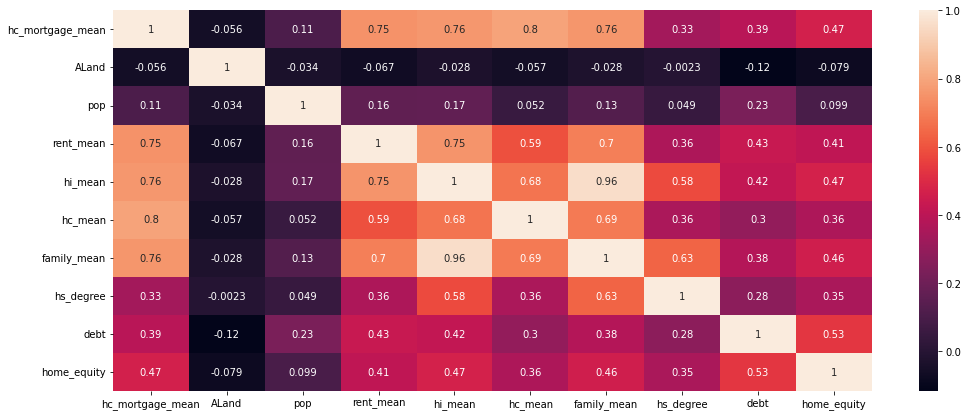

In [65]:
plt.figure(figsize=(17,7))
sns.heatmap(df_train[['hc_mortgage_mean','ALand','pop','rent_mean','hi_mean','hc_mean','family_mean','hs_degree','debt','home_equity']].corr(), annot=True)
plt.show()

'rent_mean' , 'hi_mean', 'hc_mean', 'family_mean' has a good corr with our target variable - hc_mortgage_mean	

### Project Task: Week 2

#### Data Pre-processing:

The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables. 

Each variable is assumed to be dependent upon a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent random variability, known as “specific variance” because it is specific to one variable. Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain insight into the linear relationships in the data. 

       Following are the list of latent variables:

Highschool graduation rates

Median population age

Second mortgage statistics

Percent own

Bad debt expense



In [66]:
from sklearn.decomposition import FactorAnalysis

from factor_analyzer import FactorAnalyzer

In [67]:
df_train.describe()

,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,...,female_age_samples,pct_own,married,married_snp,separated,divorced,bad_debt,good_debt,pop_density,age_median
count,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000,2.732100e+04,2.732100e+04,27321.000000,27321.000000,...,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000
mean,85.646426,28.271806,50081.999524,596.507668,37.508813,-91.288394,1.295106e+08,6.521754e+06,4316.032685,2123.924820,...,2208.761903,0.640434,0.508300,0.047537,0.019089,0.100248,0.105099,0.524090,0.002067,39.214646
std,98.333097,16.392846,29558.115660,232.497482,5.588268,16.343816,1.275531e+09,2.186781e+08,2169.226173,1114.948893,...,1085.202359,0.225525,0.136381,0.037508,0.020723,0.048883,0.070907,0.131169,0.004597,7.585480
min,1.000000,1.000000,602.000000,201.000000,17.929085,-165.453872,4.113400e+04,0.000000e+00,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.375000
25%,29.000000,13.000000,26554.000000,405.000000,33.899064,-97.816067,1.799408e+06,0.000000e+00,2885.000000,1403.000000,...,1476.000000,0.505230,0.426070,0.020960,0.004600,0.066080,0.052790,0.449350,0.000120,34.166665
50%,63.000000,28.000000,47715.000000,614.000000,38.755183,-86.554374,4.866940e+06,2.756300e+04,4042.000000,1978.000000,...,2076.000000,0.687690,0.525420,0.039110,0.013620,0.095640,0.100330,0.525220,0.000851,39.214646
75%,109.000000,42.000000,77093.000000,801.000000,41.380606,-79.782503,3.359820e+07,5.239880e+05,5430.000000,2668.000000,...,2764.000000,0.816190,0.605220,0.064860,0.027330,0.128710,0.148330,0.604100,0.002060,43.875000
max,840.000000,72.000000,99925.000000,989.000000,67.074017,-65.379332,1.039510e+11,2.453228e+10,53812.000000,27962.000000,...,27250.000000,1.000000,1.000000,0.714290,0.714290,1.000000,1.000000,1.000000,0.076536,80.166670


In [68]:
fa = FactorAnalyzer(n_factors=5)

In [69]:
fa.fit_transform(df_train.select_dtypes(exclude=('object','category')))

array([[-0.39933034,  0.55583772,  1.07093896, -1.08698579,  0.65355193],
       [-0.99248908, -0.57075893, -0.12202251,  0.10554693,  0.28386921],
       [ 0.02533901,  1.21506669,  0.4946933 , -0.50562619, -0.28848015],
       ...,
       [ 0.02046437, -0.70649548,  0.81319778, -1.37996186,  0.00873314],
       [ 2.51731673,  3.10777987,  1.14759443, -0.0630024 , -1.63083959],
       [-0.33101021, -0.23542995, -1.63171941,  0.17824411, -0.12268557]])

In [70]:
fa.loadings_

array([[-0.11482487,  0.01936373, -0.0245545 , -0.06169006,  0.03812136],
       [-0.11040899,  0.01429921,  0.02466482, -0.14796223,  0.11258263],
       [-0.0891633 ,  0.04864149, -0.12749732, -0.04931909, -0.11805326],
       [ 0.01614823,  0.0188282 ,  0.00574863,  0.02659233, -0.00973247],
       [ 0.09063446, -0.09926159, -0.05333377, -0.13305276, -0.14641972],
       [-0.00541231, -0.03861633,  0.13839861,  0.00876519,  0.1216676 ],
       [-0.04186143, -0.02024517,  0.03644117, -0.09300196,  0.06439296],
       [-0.00198676, -0.0150142 , -0.00250851, -0.04444931,  0.02563788],
       [ 0.07644546,  0.95538373, -0.08288847, -0.00717471, -0.05369428],
       [ 0.07116302,  0.91659973, -0.10342851, -0.02796311, -0.05283109],
       [ 0.07805518,  0.94595683, -0.05801542,  0.014232  , -0.05251385],
       [ 0.76054105,  0.00785577, -0.03725023,  0.11387679, -0.14404771],
       [ 0.70885225,  0.00394816, -0.04466907,  0.10817145, -0.15591822],
       [ 0.70643093,  0.02688275, -0.0

#### Data Modeling :

Build a linear Regression model to predict the total monthly expenditure for home mortgages loan. 

       Please refer deplotment_RE.xlsx. Column hc_mortgage_mean is predicted variable. This is the mean monthly mortgage and owner costs of specified geographical location.

       Note: Exclude loans from prediction model which have NaN (Not a Number) values for hc_mortgage_mean. 

       a) Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step.

       b) Run another model at State level. There are 52 states in USA.

       c) Keep below considerations while building a linear regression model:

Variables should have significant impact on predicting Monthly mortgage and owner costs

Utilize all predictor variable to start with initial hypothesis

R square of 60 percent and above should be achieved

Ensure Multi-collinearity does not exist in dependent variables

Test if predicted variable is normally distributed



In [71]:
df_train.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater', 'pop',
       'male_pop', 'female_pop', 'rent_mean', 'rent_median', 'rent_stdev',
       'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15',
       'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40',
       'rent_gt_50', 'universe_samples', 'used_samples', 'hi_mean',
       'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 'hs_degree_

In [72]:
df_train['type'].unique()

array(['City', 'Urban', 'Town', 'CDP', 'Village', 'Borough'], dtype=object)

In [73]:
type_dict = {'type':{'City':1,'Urban':2,'Town':3,'CDP':4, 'Village':5,'Borough':6}}

In [74]:
df_train.replace(type_dict, inplace=True)

In [75]:
df_test.replace(type_dict, inplace=True)

In [76]:
df_train['type'].unique()

array([1, 2, 3, 4, 5, 6])

In [77]:
feature_cols = ['COUNTYID','STATEID','zip_code','type','pop','family_mean','second_mortgage','home_equity','debt',
               'hs_degree','age_median','pct_own','married','separated','divorced']

In [78]:
X_train = df_train[feature_cols]

y_train = df_train['hc_mortgage_mean']

In [79]:
X_test = df_test[feature_cols]

y_test = df_test['hc_mortgage_mean']

In [80]:
X_train.shape, y_train.shape

((27321, 15), (27321,))

In [81]:
X_test.shape, y_test.shape

((11709, 15), (11709,))

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score

In [83]:
X_test.head()

,COUNTYID,STATEID,zip_code,type,pop,family_mean,second_mortgage,home_equity,debt,hs_degree,age_median,pct_own,married,separated,divorced
UID,,,,,,,,,,,,,,,
255504,163,26,48239,4,3417,53802.87122,0.06443,0.07651,0.63624,0.91047,30.791665,0.70252,0.28217,0.03813,0.14299
252676,1,23,4210,1,3796,85642.22095,0.01175,0.14375,0.64755,0.94290,46.375000,0.85128,0.64221,0.00000,0.13377
276314,15,42,14871,6,3944,65694.06582,0.01316,0.06497,0.45395,0.89238,43.208335,0.81897,0.59961,0.01358,0.10026
248614,231,21,42633,1,2508,44156.38709,0.00995,0.01741,0.41915,0.60908,45.500000,0.84609,0.56953,0.04694,0.12489
286865,355,48,78410,3,6230,123527.02420,0.00000,0.03440,0.63188,0.86297,43.208335,0.79077,0.57620,0.00588,0.16379


In [84]:
SC = StandardScaler()

In [85]:
X_train_Scaled = SC.fit_transform(X_train)
X_test_Scaled = SC.fit_transform(X_test)

In [86]:
Lr = LinearRegression()

In [87]:
Lr.fit(X_train_Scaled,y_train)

LinearRegression()

In [88]:
y_pred = Lr.predict(X_test_Scaled)

In [89]:
r2_score(y_test,y_pred) #R2 square

0.7348210754610929

In [90]:
np.sqrt(mean_squared_error(y_test,y_pred)) #RMSE

323.1018894984635

####  b) Run another model at State level. There are 52 states in USA.

In [91]:
state= df_train['STATEID'].nunique()

In [92]:
state= df_train['STATEID'].unique()
state

array([36, 18, 72, 20,  1, 48, 45,  6,  5, 24, 17, 19, 47, 32, 22,  8, 44,
       28, 34, 41,  4, 12, 55, 42, 37, 51, 26, 39, 40, 13, 16, 46, 27, 29,
       53, 56,  9, 54, 21, 25, 11, 15, 30,  2, 33, 49, 50, 31, 38, 35, 23,
       10])

In [93]:
for i in [11,33,35]:
    print("State_ID:",i)
    
    X_train_nation = df_train[df_train['COUNTYID']==i][feature_cols]

    y_train_nation = df_train[df_train['COUNTYID']==i]['hc_mortgage_mean']
    
    X_test_nation = df_test[df_test['COUNTYID']==i][feature_cols]

    y_test_nation = df_test[df_test['COUNTYID']==i]['hc_mortgage_mean']

    X_train_Scaled_nation = SC.fit_transform(X_train_nation)

    X_test_Scaled_nation = SC.fit_transform(X_test_nation)

    Lr.fit(X_train_Scaled_nation, y_train_nation)

    y_pred_nation = Lr.predict(X_test_Scaled_nation)
    
    print("Overall R2 score of linear regression model for state,",i,":-" ,r2_score(y_test_nation,y_pred_nation))
    print("Overall RMSE of linear regression model for state,",i,":-" ,np.sqrt(mean_squared_error(y_test_nation,y_pred_nation)))
    print("\n")

State_ID: 11
Overall R2 score of linear regression model for state, 11 :- 0.7464857169444445
Overall RMSE of linear regression model for state, 11 :- 238.10563068257605


State_ID: 33
Overall R2 score of linear regression model for state, 33 :- 0.8615614207731607
Overall RMSE of linear regression model for state, 33 :- 211.13273527746531


State_ID: 35
Overall R2 score of linear regression model for state, 35 :- 0.722243579050943
Overall RMSE of linear regression model for state, 35 :- 255.6042328589991




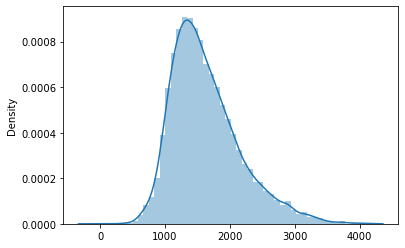

In [94]:
sns.distplot(y_pred)
plt.show()

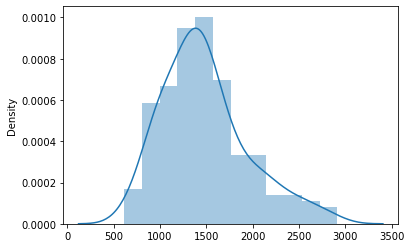

In [95]:
sns.distplot(y_pred_nation)
plt.show()

In [96]:
residuals=y_test-y_pred
residuals

UID
255504    281.969088
252676    -69.935775
276314    190.761969
248614   -157.290627
286865     -9.887017
             ...    
238088    -67.541646
242811    -41.578757
250127   -127.427569
241096   -330.820475
287763    217.760642
Name: hc_mortgage_mean, Length: 11709, dtype: float64

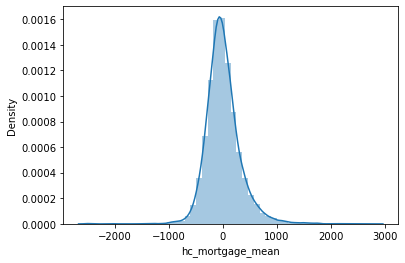

In [97]:
sns.distplot(residuals)
plt.show()

In [98]:
residuals_nation=y_test_nation-y_pred_nation
residuals_nation

UID
271383    -71.037462
271503    -92.539838
288357     84.266127
264513    -66.054827
288371    456.709228
             ...    
288512     44.115107
280441    -48.716870
288475    -49.259951
253291     74.474223
288425    201.479714
Name: hc_mortgage_mean, Length: 187, dtype: float64

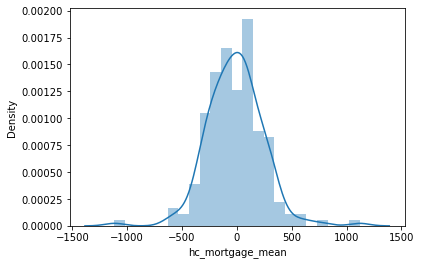

In [99]:
sns.distplot(residuals_nation)
plt.show()

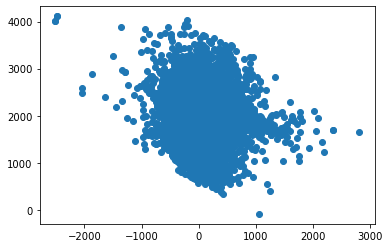

In [100]:
plt.scatter(residuals,y_pred);

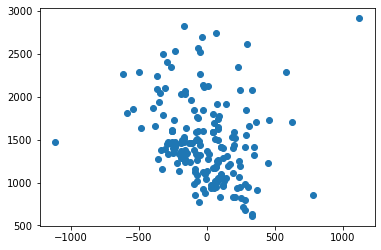

In [101]:
plt.scatter(residuals_nation,y_pred_nation);

#### Data Reporting:

- Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

- Box plot of distribution of average rent by type of place (village, urban, town, etc.).

- Pie charts to show overall debt and bad debt.

- Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map.

- Heat map for correlation matrix.

- Pie chart to show the population distribution across different types of places (village, urban, town etc.).

In [102]:
df_train_location_mort_pct.to_excel('df_train_location_mort_pct.xlsx')

In [103]:
df_train.to_excel('df_train_.xlsx')

In [105]:
df_test.to_excel('df_test_.xlsx')

In [107]:
df_train.bad_debt.to_excel('bad_debt.xlsx')

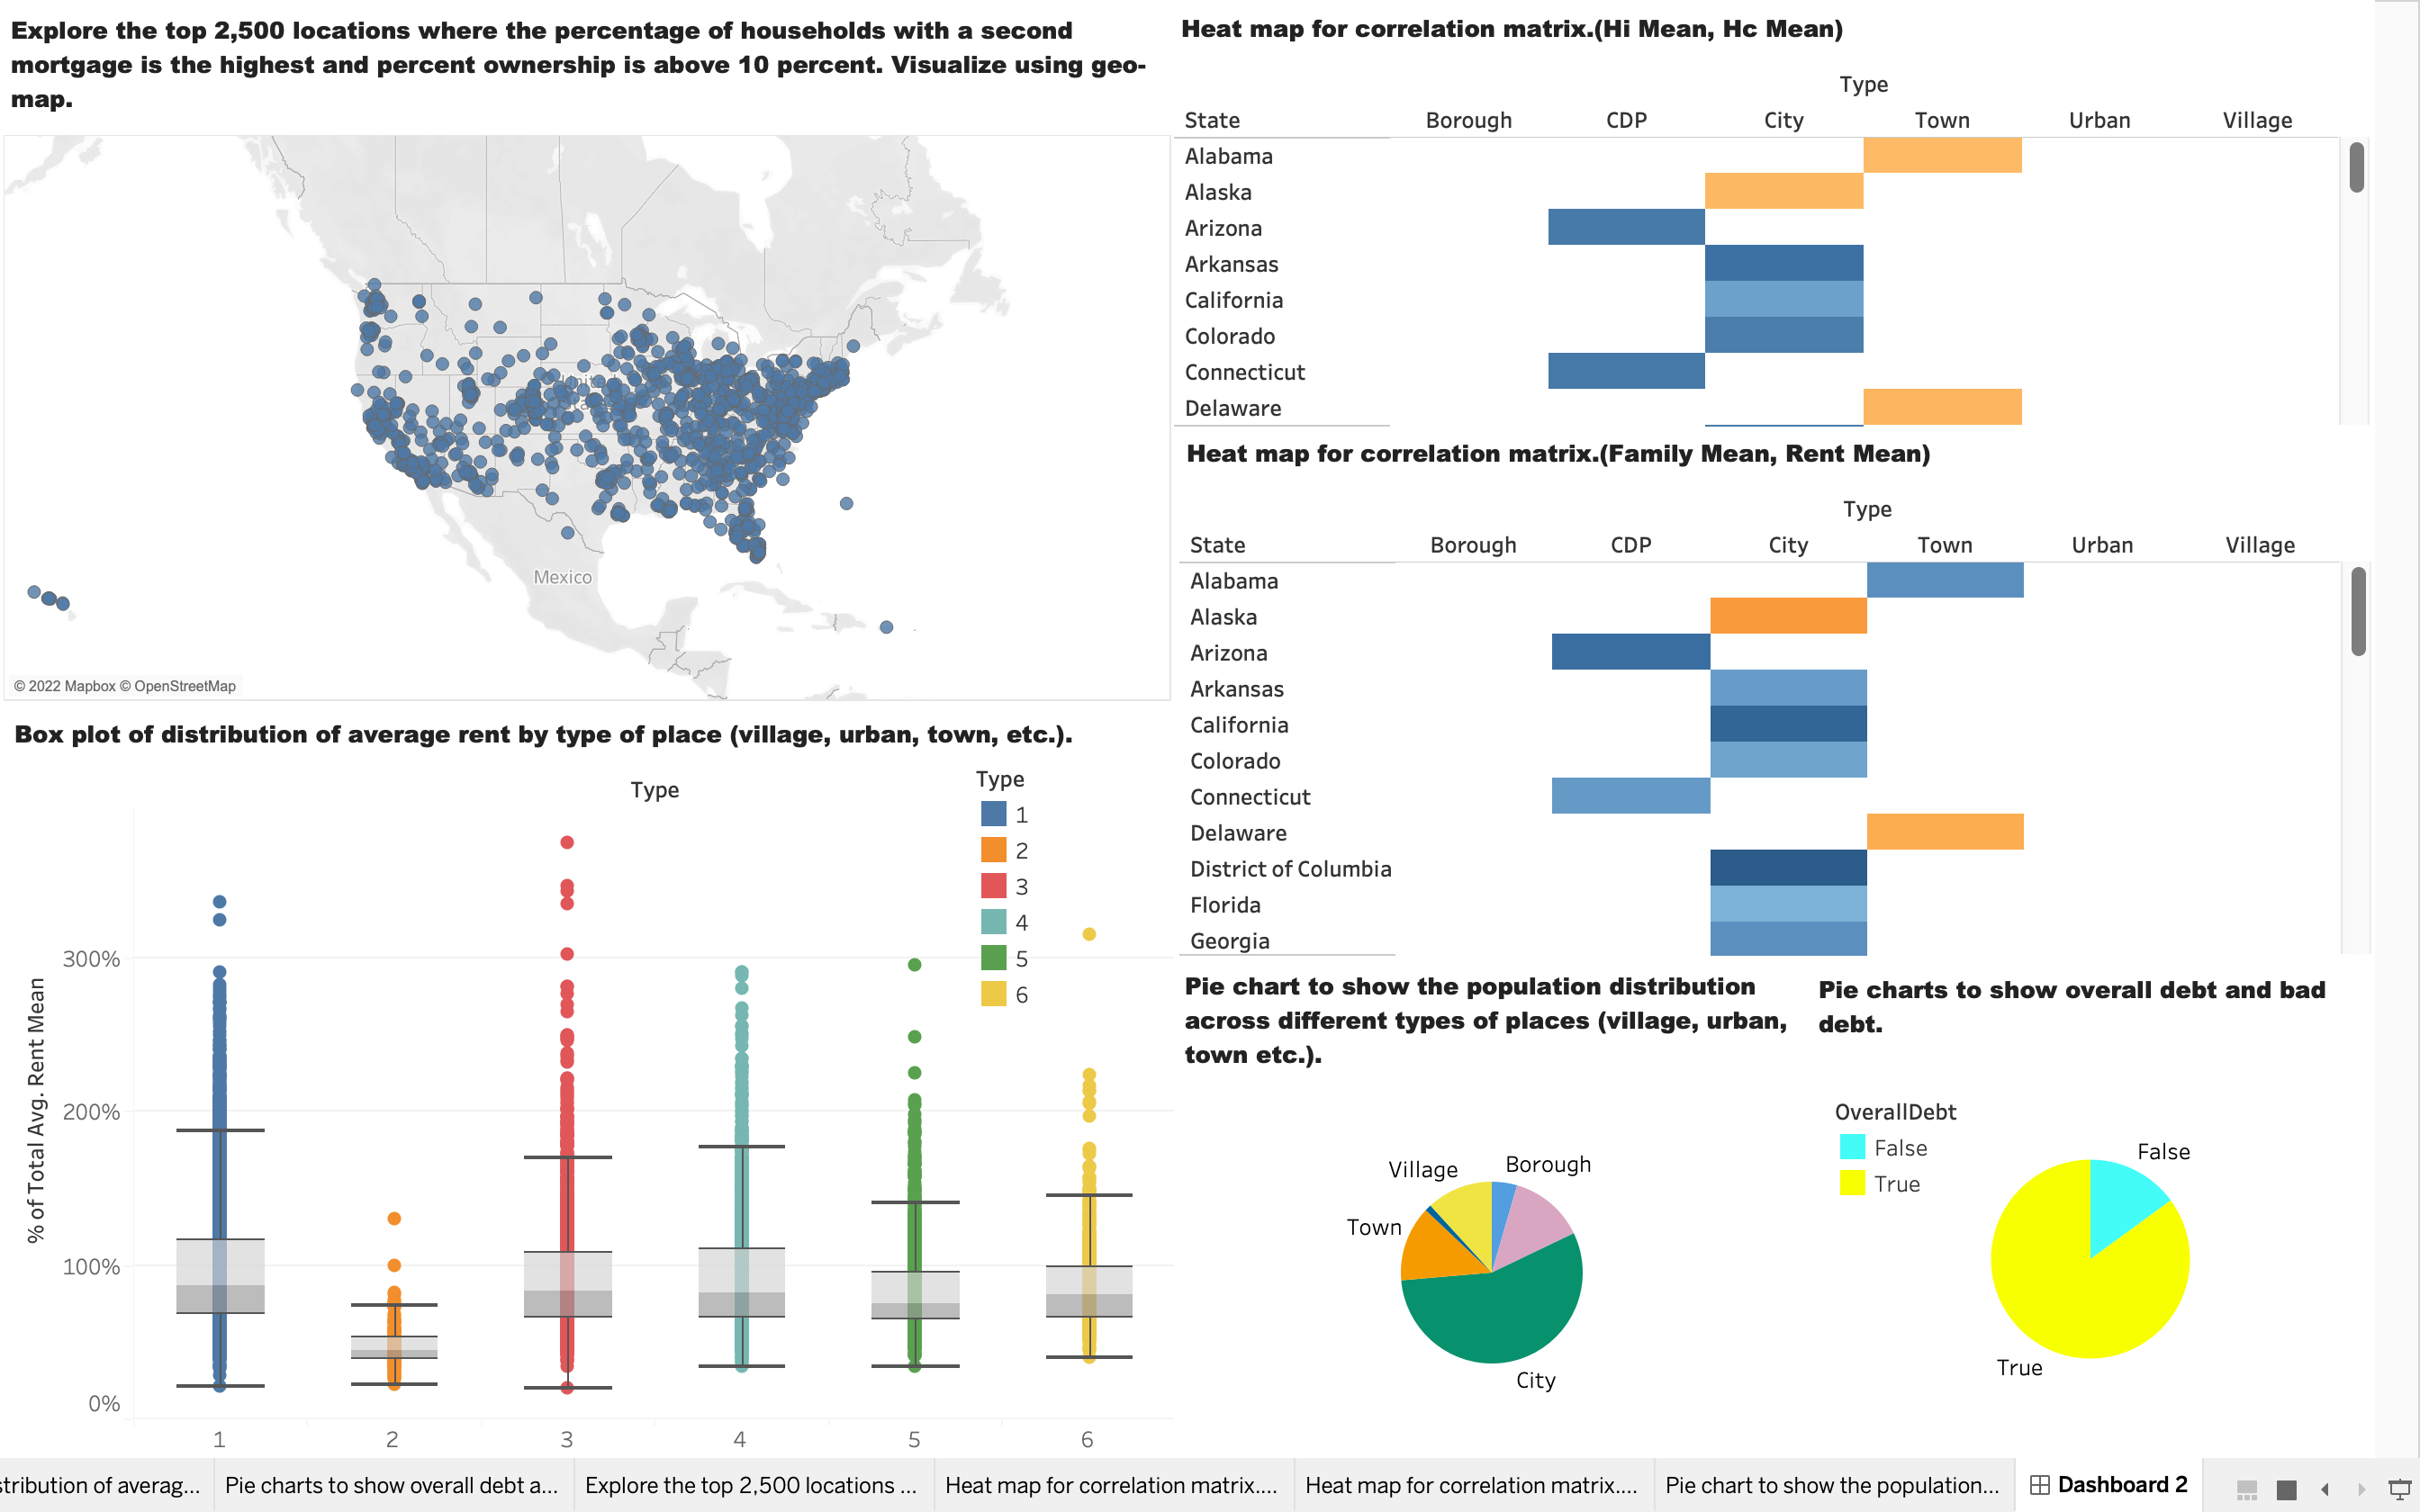

### https://public.tableau.com/app/profile/rushikesh.khankar/viz/RealEstate-StatisticalAnalysisCapProject/Dashboard2

#### Thank You